# MU4MEF04 –Méthodes Numériques pour les écoulements incompressibles- S1
## TP4 Equation de diffusion - Discrétisation explicite et implicite - Stabilité
### Master SPI – MSH
#### ZHOU Zixin 28609845

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.sparse as sps
import math

On considère l'équation de la chaleur instationnaire
$$
\frac{\partial f}{\partial t}=\frac{\partial^{2} f}{\partial x^{2}}
$$
avec des conditions aux limites périodiques. On représente $\mathrm{f}$ sur une grille régulière avec $\mathrm{N}=40$ points $\left(x_{0}, x_{1}, \ldots, x_{39}\right)$ sur $[0,1[.$ Soit la condition initiale suivante pour $\mathrm{f}$ (fonction "triangle"):

$0 \leq i \leq 9: f\left(x_{i}, t=0\right)=0$

$10 \leq i \leq 19: f\left(x_{i}, t=0\right)=2\left(x_{i}-0.25\right)$

$20 \leq i \leq 29: f\left(x_{i}, t=0\right)=2\left(-x_{i}+0.75\right)$

$30 \leq i<39: f\left(x_{i}, t=0\right)=0$

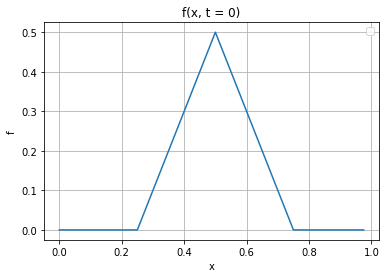

In [2]:
N   = 40

x   = np.linspace(0, 1, N, endpoint = False)  
f_0 = np.zeros(40)

for i in range(10, 20):
    f_0[i] = 2 * (x[i] - 0.25)
    
for i in range(20, 30):
    f_0[i] = 2 * ( - x[i] + 0.75)
    
plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.title(u"f(x, t = 0)")    
plt.plot(x, f_0)
plt.grid()
plt.legend() 
plt.show()

### 1. Intégrez directement en temps la solution dans l'espace de Fourier. Si vous utilisez la commande fft/ifft, on pourra écrire le vecteur d'onde associé aux composantes de Fourier $\hat{f}_{k}$ où
$$
k=[0, \ldots, N / 2,-N / 2+1, \ldots,-1]
$$
On rappelle que la commande ifft renvoie par défaut un complexe (pensez à prendre la partie réelle).

In [3]:
y_0   = np.fft.fft(f_0)

In [4]:
# k 
def K(N):
    Nh   = np.floor(N/2.).astype(int) 
    k    = np.linspace(- N/2. + 1, N/2., N, endpoint = True) 
    A    = k[Nh - 1:] 
    B    = k[: Nh - 1] 
    knew = np.append(A,B) 
    return knew

### 2. Représentez la solution à $\mathrm{t}=0.001,0.01,0.1 .$ Pouvez-vous décrire le comportement asymptotique (aux temps longs) et donner une interprétation physique de la solution?

In [5]:
# Méthode directe

def y_t_exacte(y_0, t, N):
    k   = K(N)
    y_t = np.zeros(N)
    y_t = y_0 * np.exp(- ((2. * math.pi * k) ** 2.) * t)
    return y_t


/home/zixin/.local/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


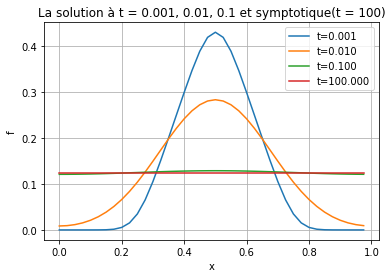

In [6]:
# La solution à t = 0.001, 0.01, 0.1 et à t suffisamment longs(par exemple: 100)

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.title(u"La solution à t = 0.001, 0.01, 0.1 et symptotique(t = 100)")
for t in [0.001, 0.01, 0.1, 100.0]:
    f_t =  np.fft.ifft(y_t_exacte(y_0,t,N))
    plt.plot(x, f_t,label ="t=%.3f"%t)
plt.grid()
plt.legend() 
plt.show()


Quand temps est suffisamment longs(t = 100), la témpérature est homogène dans chaque points sur le domain.

### 3. Ecrivez la discrétisation temporelle Euler explicite de l'equation dans l'espace de Fourier.

In [7]:
# La discrétisation temporelle Euler explicite

def y_t_explicite(y_0, dt, N, n):
    k   = K(N)
    y_n = y_0
    for i in range(n):  
        y_n = (1. - dt * ((2. * math.pi * k) ** 2.)) * y_n
    return y_n


### 4. Choisissez un pas de temps $\Delta t=0.0001 .$ Intégrez les équations dans leur représentation spectrale pour 1000 pas de temps et représentez la solution dans l'espace physique après 1000 pas de temps.

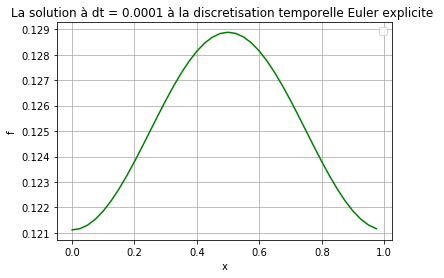

In [8]:
# Pour 1000 pas de temps = 0.0001 

dt = 0.0001
n  = 1000

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.title(u"La solution à dt = 0.0001 à la discretisation temporelle Euler explicite ")
f_t = np.fft.ifft(y_t_explicite(y_0, dt, N, n))
plt.plot(x, f_t,'g')
plt.grid()
plt.legend() 
plt.show()


### 5. Peut-on augmenter le pas de temps d'un facteur $10 ?$ Donner le pas de temps maximal pour que la solution converge en utilisant l'analyse de stabilité. Vérifier numériquement que la solution ne converge pas si le pas de temps est trop grand. Comment varie le pas de temps maximum en fonction de la taille de la grille?

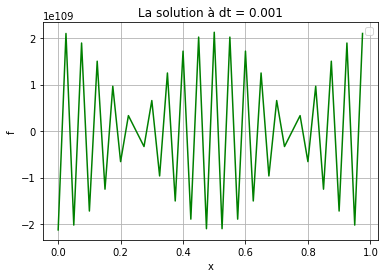

In [9]:
# Le pas de temps d’un facteur 10

dt = 0.001
n  = 100

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.title(u"La solution à dt = 0.001")
f_t =  np.fft.ifft(y_t_explicite(y_0, dt, N, n))
plt.plot(x, f_t, 'g')
plt.grid()
plt.legend() 
plt.show()


On trouve que la solution ne converge pas si on augmente le pas de temps d'un facteur 10. Si le pas de temps est trop grand, la solution ne converge pas. Le schéma explicite est conditionnellement stable.

$$
G = 1 - \Delta t (2 \pi k)^{2}
$$

$$
-1 < G < 1 
$$

$$
-1 < 1 - \Delta t(2 \pi k)^{2} < 1
$$

$$
\Delta t < \frac{2}{(2 \pi k)^{2}}
$$
Le pas de temps est maximal pour : $k=\frac{N}{2}$

Donc, 

$$
\Delta t < \frac{2}{( \pi N)^{2}}
$$


In [10]:
print "Le pas de temps maximum est ",2. / ((math.pi * N) ** 2)

Le pas de temps maximum est  0.000126651479553


Le pas de temps maximum est proposionnel à $\frac {1}{N^{2}}$

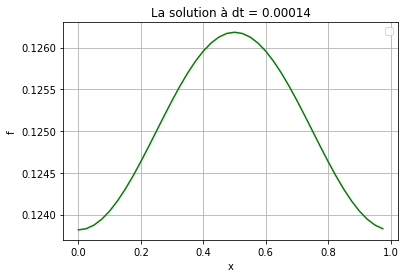

In [11]:
dt = 0.00013
n  = 1000

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.title(u"La solution à dt = 0.00014")
f_t =  np.fft.ifft(y_t_explicite(y_0, dt, N, n))
plt.plot(x, f_t, 'g')
plt.grid()
plt.legend() 
plt.show()

On a vérifié numériquement que le pas de temps maximal pour la solution converge est environ 0.00013. 

### 6. Mêmes questions 3 à 5 pour la discrétisation temporelle Euler implicite. Pouvez-vous expliquer pourquoi les termes de diffusions dans l'équation de Navier-Stokes sont traités implicitement?

In [12]:
# La discrétisation temporelle Euler implicite

def y_t_implicite(y_0, dt, N, n):
    
    k   = K(N)
    y_n = y_0
    for i in range(n):  
        y_n = y_n / (1. + dt * ((2. * math.pi * k) ** 2.))
    return y_n


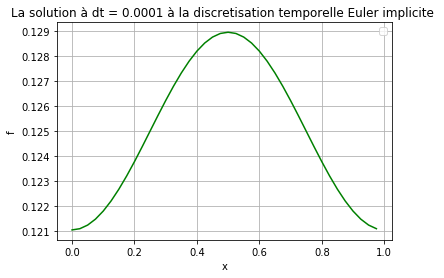

In [13]:
# Pour 1000 pas de temps = 0.0001 
dt = 0.0001
n  = 1000

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.title(u"La solution à dt = 0.0001 à la discretisation temporelle Euler implicite ")
f_t =  np.fft.ifft(y_t_implicite(y_0, dt, N, n))
plt.plot(x, f_t, 'g')
plt.grid()
plt.legend() 
plt.show()


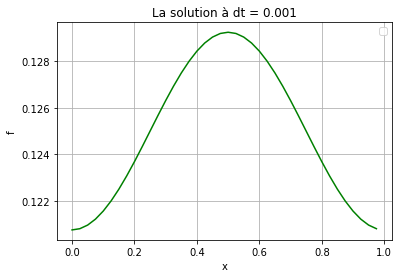

In [14]:
# Le pas de temps d’un facteur 10 pour implicite

dt = 0.001
n  = 100

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.title(u"La solution à dt = 0.001")
f_t =  np.fft.ifft(y_t_implicite(y_0, dt, N, n))
plt.plot(x, f_t, 'g')
plt.grid()
plt.legend() 
plt.show()

On trouve que la solution converge si on augmente le pas de temps d'un facteur 10. Si le pas de temps est trop grand, la solution aussi converge. 
$$
G = \frac {1}{1 + \Delta t (2 \pi k)^{2}}
$$

Le G est toujours inféreur à 1 et supéreure à -1. Donc, le schéma implicite est inconditionnellement stable.


Les termes de diffusions dans l'équation de Navier-Stokes sont traités implicitement car on voit utiliser des formulations implicites qui permettent d’alléeger les contraintes liées au pas de temps.

### 7. (bonus) Recommencer avec une discrétisation en espace par différences finies centrées.

In [15]:
# Discrétisation explicite - schéma centré

def F_centre(f_0, N, dt, dx, n):
    ftmp = f_0
    f_t  = np.zeros(N)
    for i in range(1,n + 1):  
        f_t[0] = dt * (ftmp[1] - ftmp[0])  / (dx ** 2) + ftmp[0]
        for j in range(1,N - 1):           
            f_t[j] = dt * (ftmp[j + 1] + ftmp[j-1]) / (dx ** 2) + (1 - 2 * dt /  (dx ** 2))  * ftmp[j]
        f_t[N-1] = dt * (ftmp[N - 1] - ftmp[N - 2])  / (dx ** 2) + ftmp[0]    
        ftmp = f_t.copy()
    return f_t

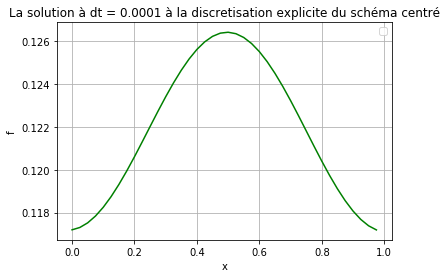

In [16]:
dt = 0.00001
dx = 1./40.
N  = 40
n  = 10000

plt.figure()
plt.xlabel("x")
plt.ylabel("f")
plt.title(u"La solution à dt = 0.0001 à la discretisation explicite du schéma centré")
plt.plot(x, F_centre(f_0, N, dt, dx, n), 'g')
plt.grid()
plt.legend() 
plt.show()


Schéma conditionnellement stable, CFL:

$$
\Delta t < \frac{\Delta x ^ {2}}{2}
$$

Ici, N = 40, 
$$
\Delta x = \frac{1}{N} = 0.025
$$

Donc, 
$$
\Delta t < 0.0003125
$$
